In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = "data_derecha_laser.xlsx"
data = pd.read_excel(data)
print(data)

    x_con_desf (m)  V_con_offset (V)  error x_con_desf (m)  error V (V)
0          -0.0034            0.0323              0.000005       0.0001
1          -0.0032            0.0444              0.000005       0.0001
2          -0.0030            0.0597              0.000005       0.0001
3          -0.0028            0.0773              0.000005       0.0001
4          -0.0026            0.0982              0.000005       0.0001
5          -0.0024            0.1201              0.000005       0.0001
6          -0.0022            0.1455              0.000005       0.0001
7          -0.0020            0.1733              0.000005       0.0001
8          -0.0018            0.2015              0.000005       0.0001
9          -0.0016            0.2295              0.000005       0.0001
10         -0.0014            0.2565              0.000005       0.0001
11         -0.0012            0.2845              0.000005       0.0001
12         -0.0010            0.3095              0.000005      

In [2]:
# Define the linear function for curve fitting
def frauhofer_approximated_single_function(X, A, B, C):
    return np.abs(A)*( ( np.sin(np.abs(B)*X + C ) )/( np.abs(B)*X + C ) )


# Perform the curve fitting considering the uncertainties
popt, pcov = curve_fit(frauhofer_approximated_single_function, data['x_con_desf (m)'], data['V_con_offset (V)'], sigma=data['error V (V)'], p0 = [0.3745, 468.89, 1e-2], absolute_sigma=True, maxfev = 10000)

A: 0.3627561540736966 ± 2.909929167047691e-05
B: 937.6056723277588 ± 0.07049646120777125
C: 0.021323590009155215 ± 0.0001387140903559247


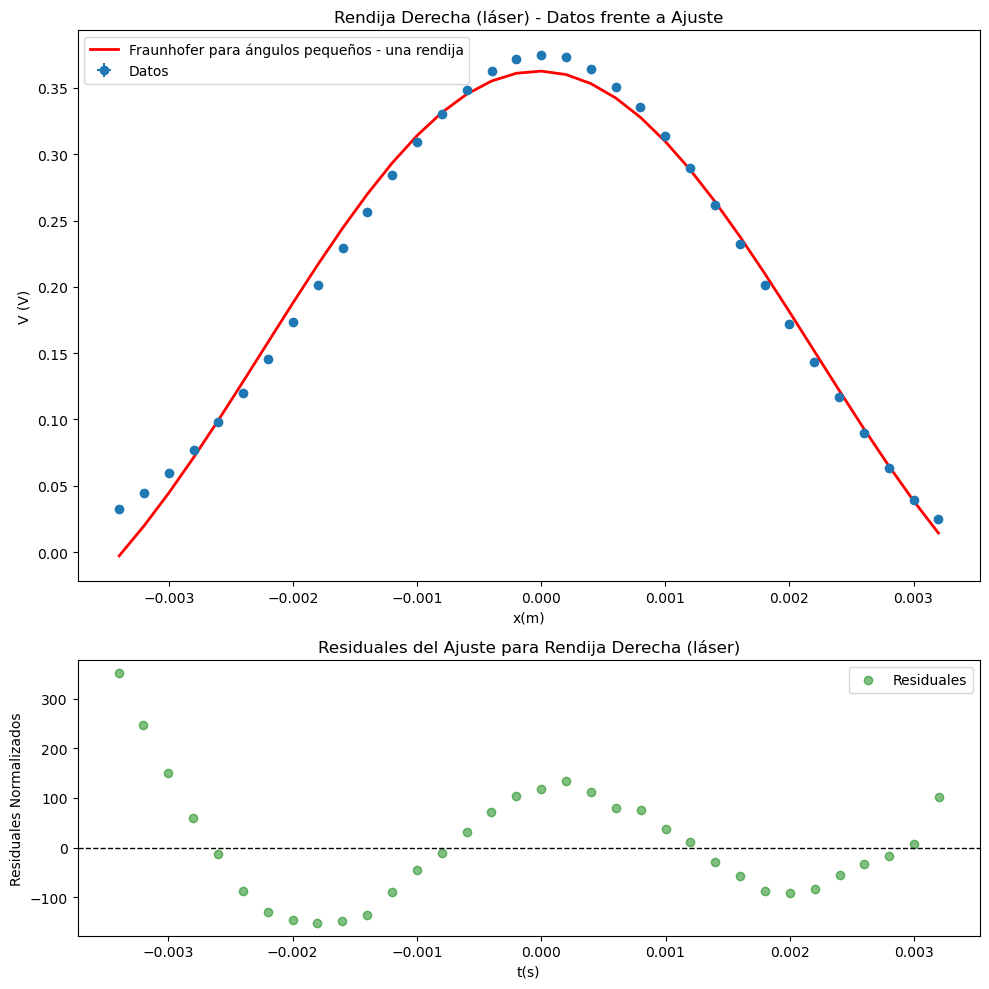

In [3]:
# Get the slope and intercept
A = popt[0]
B = popt[1]
C = popt[2]

# Get the standard errors for the parameters
A_std_err = np.sqrt(pcov[0, 0])
B_std_err = np.sqrt(pcov[1, 1])
C_std_err = np.sqrt(pcov[2, 2])

## Setting variables
x = data['x_con_desf (m)']
y = data['V_con_offset (V)']
yerr = data['error V (V)']
xerr = data['error x_con_desf (m)']

# Predict the Y values
Y_pred = frauhofer_approximated_single_function(x, *popt)

# Calculate normalized residuals
residuals = (y - Y_pred)/yerr

print(f"A: {A} ± {A_std_err}")
print(f"B: {B} ± {B_std_err}")
print(f"C: {C} ± {C_std_err}")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})  # 2 rows, 1 column, width = 10 inches, height = 10 inches

# Plot the regression line
ax1.errorbar(x, y, yerr, xerr,  fmt='o', label='Datos')
ax1.plot(x, Y_pred, color='red', linewidth=2, label=f'Fraunhofer para ángulos pequeños - una rendija')

ax1.set_xlabel('x(m)')
ax1.set_ylabel('V (V)')
ax1.legend(loc='upper left')
ax1.set_title('Rendija Derecha (láser) - Datos frente a Ajuste')

# Plot normalized residuals
ax2.scatter(x, residuals, color='green', alpha=0.5, label='Residuales')
ax2.axhline(0, color='black', linewidth=1, linestyle='--')
ax2.set_xlabel('t(s)')
ax2.set_ylabel('Residuales Normalizados')
ax2.legend(loc='upper right')
ax2.set_title('Residuales del Ajuste para Rendija Derecha (láser)')

plt.tight_layout()

# Save the figure as a PDF file
plt.savefig('rendija_derecha_láser.pdf', format='pdf')
plt.show()

